In [1]:
import xarray as xr
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
import numpy as np
import pandas as pd
import netCDF4
from mpl_toolkits.basemap import Basemap
from netCDF4 import Dataset
import numpy as np
import nco
from numpy import *

In [42]:
file=xr.open_dataset('D:MMHC12K-DLY.nc')
test = file.incrain[3653:4017,:,:]
test
test.to_netcdf('D:testWRF1.nc')

In [23]:
file=xr.open_dataset('D:MMHC12K-DLY.nc')
file

<xarray.Dataset>
Dimensions:  (lat: 199, lon: 119, time: 4017)
Coordinates:
  * lon      (lon) float32 89.2649 89.3791 89.4933 89.6075 89.7217 89.8359 ...
  * lat      (lat) float32 8.0303 8.1377 8.2451 8.3525 8.4599 8.5673 8.6747 ...
  * time     (time) datetime64[ns] 2004-12-01 2004-12-02 2004-12-03 ...
Data variables:
    incrain  (time, lat, lon) float64 ...
Attributes:
    CDI:          Climate Data Interface version 1.8.2 (http://mpimet.mpg.de/...
    Conventions:  CF-1.6
    history:      Mon Feb 12 04:12:53 2018: cdo -O mergetime MMHC12K-Y05-dly....
    CDO:          Climate Data Operators version 1.8.2 (http://mpimet.mpg.de/...

In [12]:
wrf = file.time[0:3000]
wrf

<xarray.DataArray 'time' (time: 3000)>
array(['2004-12-01T00:00:00.000000000', '2004-12-02T00:00:00.000000000',
       '2004-12-03T00:00:00.000000000', ..., '2013-02-14T00:00:00.000000000',
       '2013-02-15T00:00:00.000000000', '2013-02-16T00:00:00.000000000'], dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2004-12-01 2004-12-02 2004-12-03 ...
Attributes:
    standard_name:  time
    axis:           T

In [11]:
file = fromfile('D:data/output/ERAItoWRF_DS_AlexNet_standardized_20000step_train_erai_NewData_17.dat')
file
file.shape

(11840,)

In [32]:
file=xr.open_dataset('D:trainHistoricalERAI1990to2000.nc')
file

<xarray.Dataset>
Dimensions:    (latitude: 29, longitude: 17, time: 8036)
Coordinates:
  * longitude  (longitude) float32 90.0 90.75 91.5 92.25 93.0 93.75 94.5 ...
  * latitude   (latitude) float32 30.0 29.25 28.5 27.75 27.0 26.25 25.5 ...
  * time       (time) datetime64[ns] 1990-01-01T12:00:00 1990-01-02 ...
Data variables:
    tp         (time, latitude, longitude) float64 ...
Attributes:
    Conventions:  CF-1.6
    history:      2018-02-12 06:17:32 GMT by grib_to_netcdf-2.6.0: grib_to_ne...

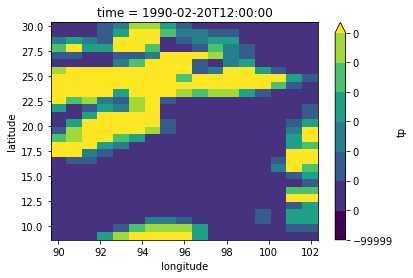

In [37]:
sst = file.tp[100,:,:].plot(levels=[-99999, 0, 0.0005, 0.0010, 0.0015, 0.0020, 0.0025, 0.0030])
plt.show()

In [12]:
!ncdump -h D:erainterim/mmsfc-200908.nc
#!pwd

netcdf D\:erainterim/mmsfc-200908 {
dimensions:
	lon = 17 ;
	lat = 29 ;
	depth = 1 ;
	bnds = 2 ;
	depth_2 = 1 ;
	depth_3 = 1 ;
	depth_4 = 1 ;
	time = UNLIMITED ; // (372 currently)
variables:
	float lon(lon) ;
		lon:standard_name = "longitude" ;
		lon:long_name = "longitude" ;
		lon:units = "degrees_east" ;
		lon:axis = "X" ;
	float lat(lat) ;
		lat:standard_name = "latitude" ;
		lat:long_name = "latitude" ;
		lat:units = "degrees_north" ;
		lat:axis = "Y" ;
	double depth(depth) ;
		depth:long_name = "depth_below_land" ;
		depth:units = "cm" ;
		depth:positive = "down" ;
		depth:axis = "Z" ;
		depth:bounds = "depth_bnds" ;
	double depth_bnds(depth, bnds) ;
	double depth_2(depth_2) ;
		depth_2:long_name = "depth_below_land" ;
		depth_2:units = "cm" ;
		depth_2:positive = "down" ;
		depth_2:axis = "Z" ;
		depth_2:bounds = "depth_2_bnds" ;
	double depth_2_bnds(depth_2, bnds) ;
	double depth_3(depth_3) ;
		depth_3:long_name = "depth_below_land" ;
		depth_3:units = "cm" ;
		depth_3:positive

In [29]:
ncks -d time,0,364 data.nc 1990.nc

SyntaxError: invalid syntax (<ipython-input-29-aa2ead1cd605>, line 1)

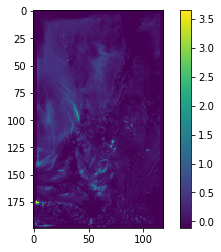

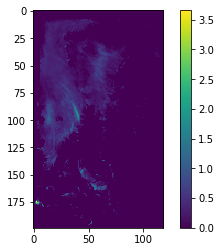

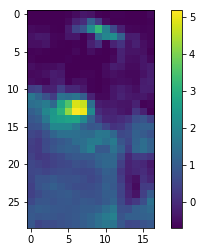

In [32]:
#examine output images
from pylab import figure, axes, pie, title, show

wrf=np.fromfile('D:output/AlexNet_wrf_output.dat',float32)
a = wrf.reshape(146,23681)
b = a[5].reshape(199,119)
b.shape
plt.imshow(b)
plt.colorbar()
plt.savefig('D:output/1.jpg')
plt.show()

dplg=np.fromfile('D:output/AlexNet_dplg_output.dat',float32)
a = dplg.reshape(146,23681)
b = a[5].reshape(199,119)
b.shape
plt.imshow(b)
plt.colorbar()
plt.savefig('D:output/2.jpg')
plt.show()

erai=np.fromfile('D:output/AlexNet_erai_input.dat',float32)
a = erai.reshape(146,493)
b = a[5].reshape(29,17)
b.shape
plt.imshow(b)
plt.colorbar()
plt.savefig('D:output/3.jpg')
plt.show()


In [43]:
wrffile = xr.open_dataset('D:MMFC12K-DLY.nc')
wrffile

<xarray.Dataset>
Dimensions:  (lat: 199, lon: 119, time: 4017)
Coordinates:
  * lon      (lon) float32 89.2649 89.3791 89.4933 89.6075 89.7217 89.8359 ...
  * lat      (lat) float32 8.0303 8.1377 8.2451 8.3525 8.4599 8.5673 8.6747 ...
  * time     (time) datetime64[ns] 2004-12-01 2004-12-02 2004-12-03 ...
Data variables:
    incrain  (time, lat, lon) float64 ...
Attributes:
    CDI:          Climate Data Interface version 1.8.2 (http://mpimet.mpg.de/...
    Conventions:  CF-1.6
    history:      Mon Feb 12 04:12:58 2018: cdo -O mergetime MMFC12K-Y05-dly....
    CDO:          Climate Data Operators version 1.8.2 (http://mpimet.mpg.de/...

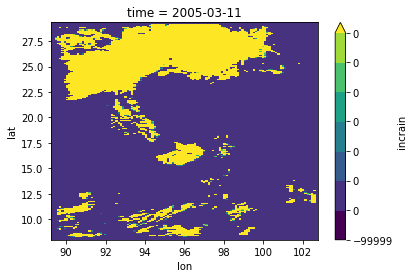

In [46]:
sst = wrffile.incrain[100,:,:].plot(levels=[-99999, 0, 0.0005, 0.0010, 0.0015, 0.0020, 0.0025, 0.0030])
plt.show()